<a href="https://colab.research.google.com/github/RamaKumar-Chennai/Multi-Class-Fish-Image-Classification/blob/main/fish_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install requied packages

! pip install torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 113.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the libraries
# File Handling and Image Processing
import os
import zipfile
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

# Torch and Vision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

# Display and Progress
from IPython.display import display
from tqdm import tqdm

# Data Handling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the ZIP file
#Zip path
zip_path = "/content/drive/MyDrive/Dataset.zip"
#Extract path
extract_path = "/content/drive/MyDrive/Dataset"
#To extract all zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
#To print the extract path
print("Unzipped successfully to:", extract_path)



Unzipped successfully to: /content/drive/MyDrive/Dataset


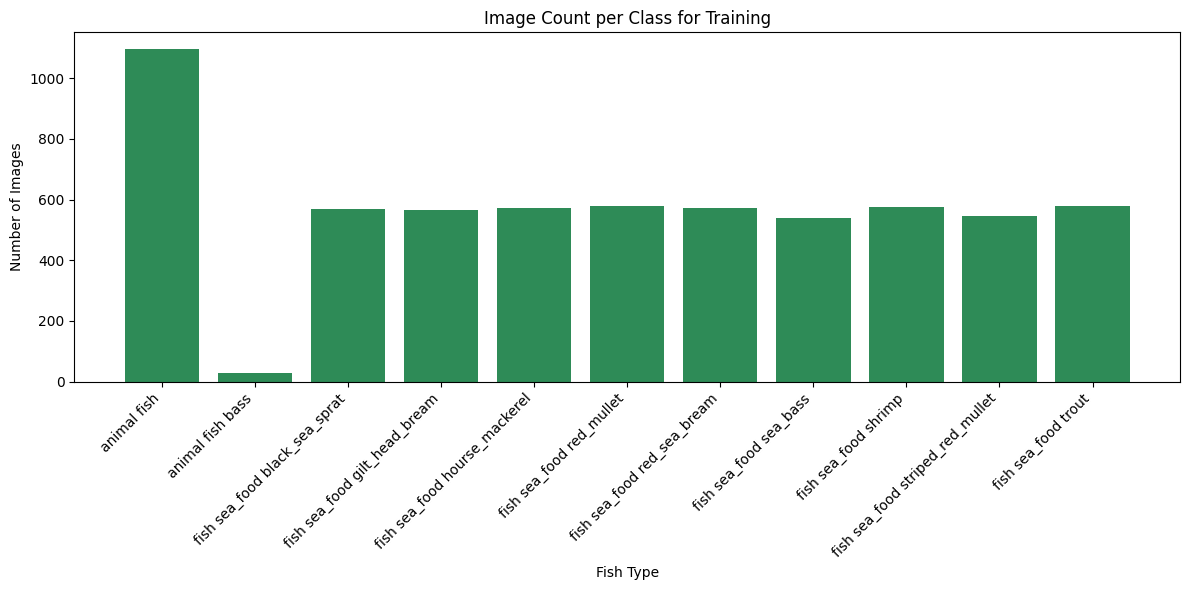

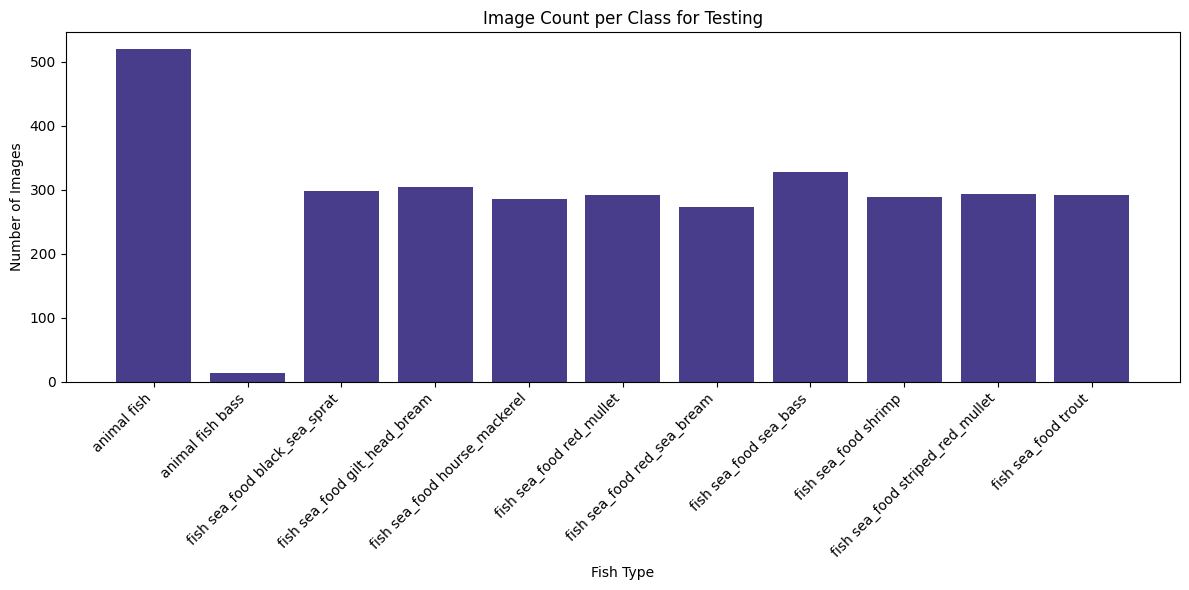

In [ ]:
#Visualisation for training and testing data
#To load the training images path

data_path = '/content/drive/MyDrive/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'
#To create the dictionary
class_counts = {}
#using for loop and using os method list each folder
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot it
plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(), class_counts.values(), color="seagreen")
plt.xticks(rotation=45, ha='right')
plt.title("Image Count per Class for Training")
plt.xlabel("Fish Type")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

#To load the testing images path
data_path = '/content/drive/MyDrive/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'
#To create the dictionary
class_counts = {}
#using for loop and using os method list each folder
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot it
plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(), class_counts.values(), color='darkslateblue')
plt.xticks(rotation=45, ha='right')
plt.title("Image Count per Class for Testing")
plt.xlabel("Fish Type")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

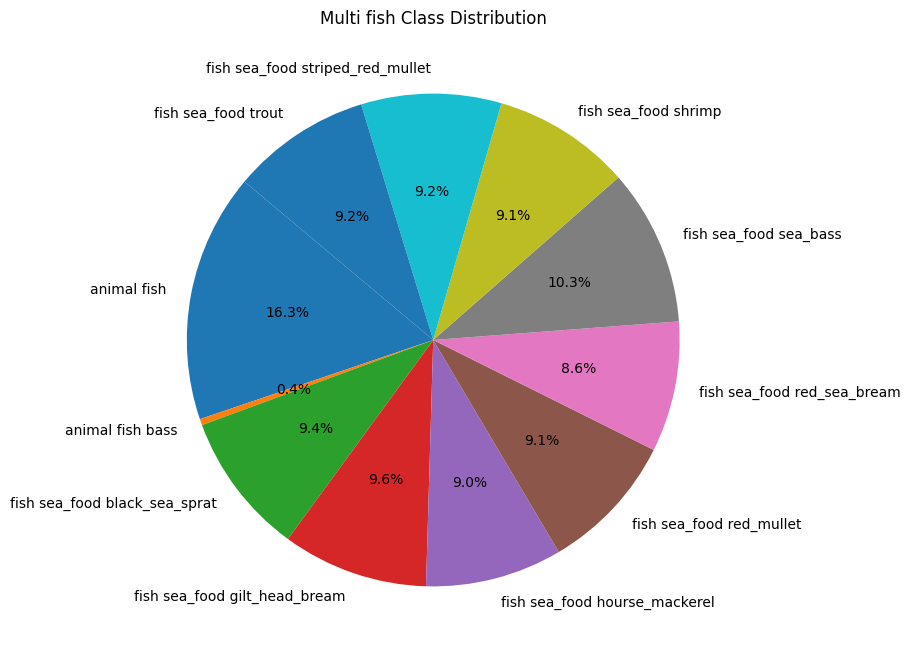

In [ ]:
# Pie chart to show the Multi fish Class Distribution
plt.figure(figsize=(8,8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Multi fish Class Distribution")
plt.show()

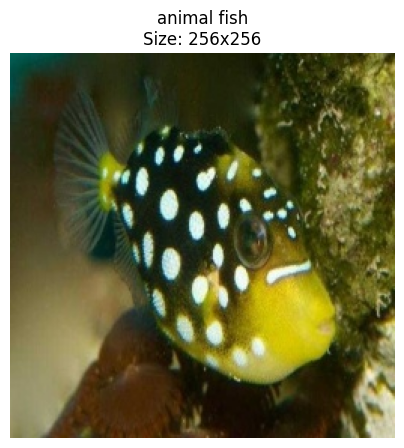

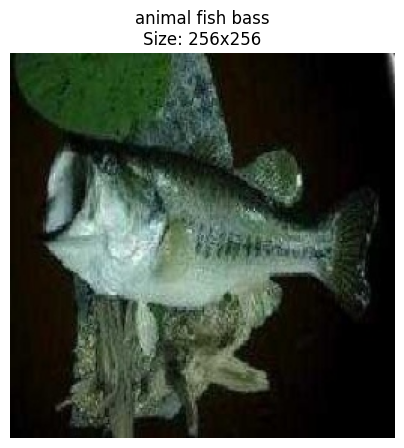

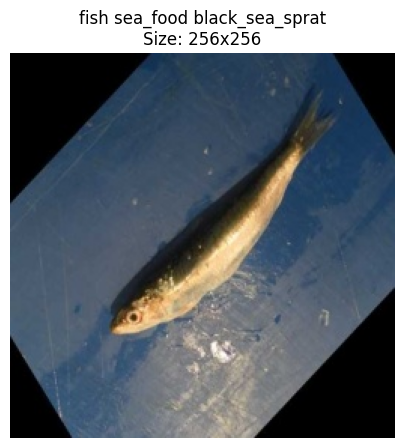

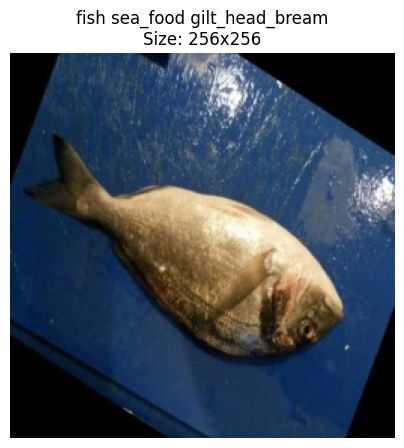

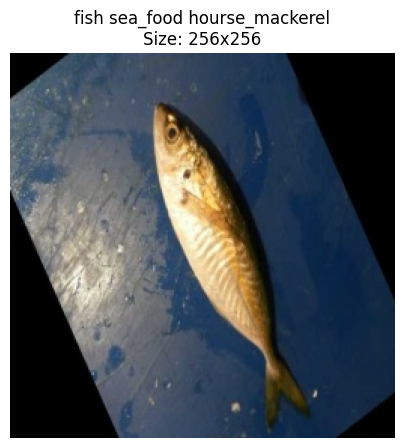

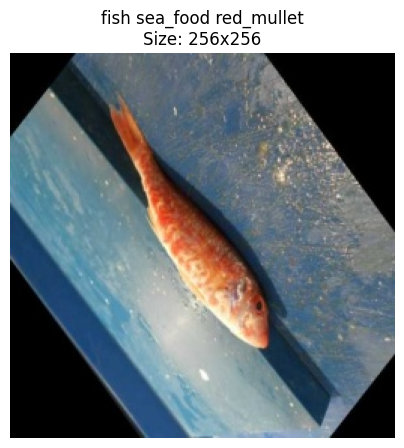

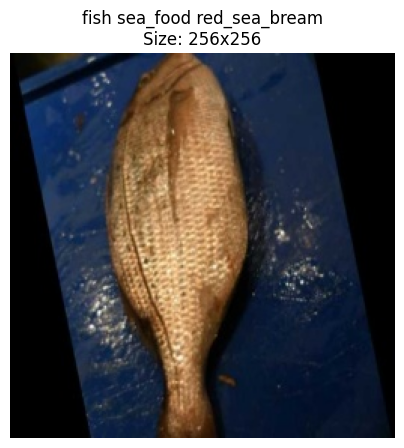

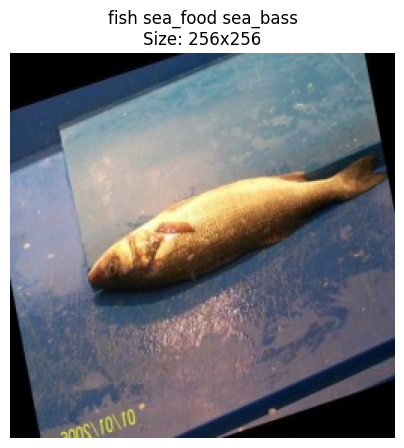

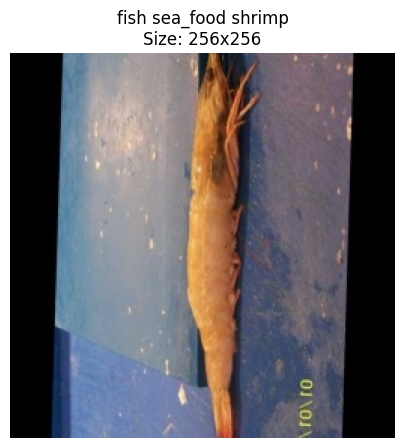

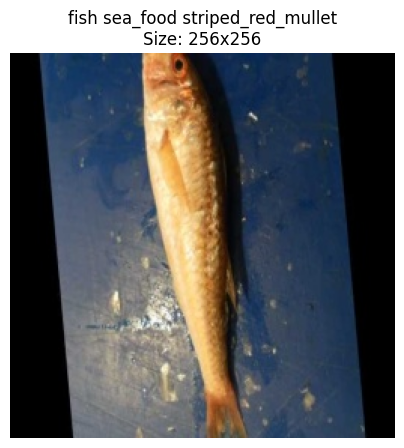

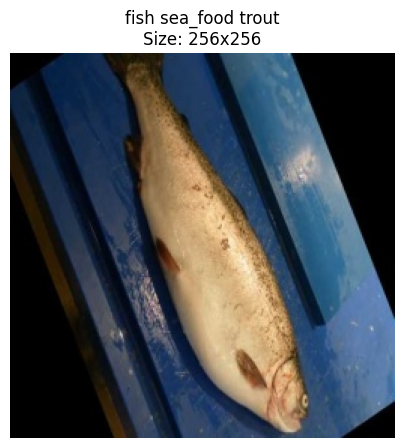

In [ ]:
#Display the images in each fish class in a random manner
#To load the training images path
data_path = '/content/drive/MyDrive/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'

#to create the function for random images show in traning dataset
def display_sample_images_with_size(data_path):
    # Loop through each class in the dataset
    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)

        # Proceed only if it's a directory (i.e., a class)
        if os.path.isdir(class_path):
            # Get a random image from the class
            image_files = os.listdir(class_path)
            sample_image = random.choice(image_files)
            img_path = os.path.join(class_path, sample_image)

            # Read the image and get its dimensions
            img = mpimg.imread(img_path)
            height, width, _ = img.shape  # Get image height, width, and channels

            # Plot the image along with its size
            plt.figure(figsize=(5, 5))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{class_name}\nSize: {width}x{height}")
            plt.show()

# Display sample images and their sizes for each class
display_sample_images_with_size(data_path)


In [ ]:

# Image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),             # Resize image
    transforms.RandomHorizontalFlip(p=0.5),    # Randomly flip image horizontally
    transforms.RandomRotation(degrees=15),     # Random rotation between -15 to 15 degrees
    transforms.RandomAffine(degrees=0,         # No additional rotation
                            scale=(0.9, 1.1)), # Random zoom between 90% and 110%
    transforms.ToTensor(),                     # Convert to tensor and rescale to [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

    ])

In [ ]:
# Apply transform to the training dataset
train_dataset = datasets.ImageFolder(root="/content/drive/MyDrive/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train", transform=transform)

# Create DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,num_workers=2,pin_memory=True)


In [ ]:
# Apply transform to the testing dataset
test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test', transform=transform)

# Create DataLoader for testing
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False,num_workers=2,pin_memory=True)

In [ ]:
# Apply transform to the validation dataset
val_dataset = datasets.ImageFolder(root="/content/drive/MyDrive/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val", transform=transform)

# Create DataLoader for validation
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False,num_workers=2,pin_memory=True)


In [ ]:
#Print the class name and class index
print((train_dataset.class_to_idx))

{'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


In [ ]:
#Convert class_to_idx dictionary to DataFrame
class_df = pd.DataFrame(list(train_dataset.class_to_idx.items()), columns=['Class Name', 'Class Index'])

# Display the DataFrame
print(class_df)

                          Class Name  Class Index
0                        animal fish            0
1                   animal fish bass            1
2      fish sea_food black_sea_sprat            2
3      fish sea_food gilt_head_bream            3
4      fish sea_food hourse_mackerel            4
5           fish sea_food red_mullet            5
6        fish sea_food red_sea_bream            6
7             fish sea_food sea_bass            7
8               fish sea_food shrimp            8
9   fish sea_food striped_red_mullet            9
10               fish sea_food trout           10


In [ ]:
# Define the model
model = nn.Sequential(
    # First Convolutional Block
    nn.Conv2d(3, 32, kernel_size=3, padding=1),  # Input: (3, 224, 224)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),  # Output: (32, 112, 112)
    nn.Dropout(p=0.5),

    # Second Convolutional Block
    nn.Conv2d(32, 64, kernel_size=3, padding=1),  # Output: (64, 56, 56)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Dropout(p=0.5),

    # Flatten and Fully Connected Layers
    nn.Flatten(),
    nn.Linear(64 * 56 * 56, 128),  # First FC layer (input size: 64 * 56 * 56 = 200704)
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(128, 11)  # Output layer (11 classes)
)

# Print the model architecture
print(model)


Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.5, inplace=False)
  (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Dropout(p=0.5, inplace=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=200704, out_features=128, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.5, inplace=False)
  (12): Linear(in_features=128, out_features=11, bias=True)
)


INPUT for first CONV2D LAYER:            OUTPUT from first CONV2D LAYER:


(3,224, 224)                       (32,224,224)

FORMULA: ((N-F+2P)/S) +1=(224-3+2(1))/1  +1=224
HERE N=224;F=3;P=1;S=1


INPUT FOR MAXPOOL2D LAYER:               OUTPUT for first  MAXPOOL2D LAYER:
(32,224,224)                               (32,112,112)



INPUT for first CONV2D LAYER:            OUTPUT for first CONV2D LAYER:


(32,112,112)                      (64,112,112)

FORMULA: ((N-F+2P)/S) +1=(112-3+2(1))/1  +1=112
HERE N=112;F=3;P=1;S=1

INPUT FOR MAXPOOL2D LAYER:               OUTPUT for first  MAXPOOL2D LAYER:
(64,112,112)                            (64,56,56)



INPUT FOR LINEAR LAYER:  64 multiplied by 56 multiplied by 56 = 200704




In [ ]:
#Initialize the loss and optimizer
criterion=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
#Training the CNN MODEL with the training data
# Check if CUDA (GPU) is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
epochs = 20
# Move model to the selected device (either GPU or CPU)
model = model.to(device)

# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for images, labels in train_loader:
        # Move data to the selected device (GPU or CPU)
        images, labels = images.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track running loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

    # Calculate training loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct_preds / total_preds

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

Using device: cuda
Epoch [1/20], Loss: 2.5638, Accuracy: 0.2869
Epoch [2/20], Loss: 1.4985, Accuracy: 0.4607
Epoch [3/20], Loss: 1.2368, Accuracy: 0.5480
Epoch [4/20], Loss: 1.0922, Accuracy: 0.5982
Epoch [5/20], Loss: 0.9434, Accuracy: 0.6474
Epoch [6/20], Loss: 0.9023, Accuracy: 0.6562
Epoch [7/20], Loss: 0.8244, Accuracy: 0.6884
Epoch [8/20], Loss: 0.7628, Accuracy: 0.7018
Epoch [9/20], Loss: 0.7381, Accuracy: 0.7195
Epoch [10/20], Loss: 0.6875, Accuracy: 0.7351
Epoch [11/20], Loss: 0.6805, Accuracy: 0.7446
Epoch [12/20], Loss: 0.6642, Accuracy: 0.7454
Epoch [13/20], Loss: 0.6132, Accuracy: 0.7648
Epoch [14/20], Loss: 0.6075, Accuracy: 0.7632
Epoch [15/20], Loss: 0.5476, Accuracy: 0.7894
Epoch [16/20], Loss: 0.5715, Accuracy: 0.7828
Epoch [17/20], Loss: 0.5341, Accuracy: 0.7902
Epoch [18/20], Loss: 0.5397, Accuracy: 0.7934
Epoch [19/20], Loss: 0.5087, Accuracy: 0.8031
Epoch [20/20], Loss: 0.4937, Accuracy: 0.8140


Key Observations from the  Training Logs
Loss is decreasing smoothly:

Accuracy improves rapidly at first, then plateaus:

From Epoch 1 to 8: Accuracy jumps from 28% to 70% — great learning phase.

From Epoch 17 to 20: Smaller gains (79% to 81%), indicating nearing convergence.

Best Accuracy = 81.4% (on training set):

If test accuracy is similar → model is performing well.

Accuracy: 91.28%
Precision: 91.36%
Recall: 91.28%
F1 Score: 91.05%


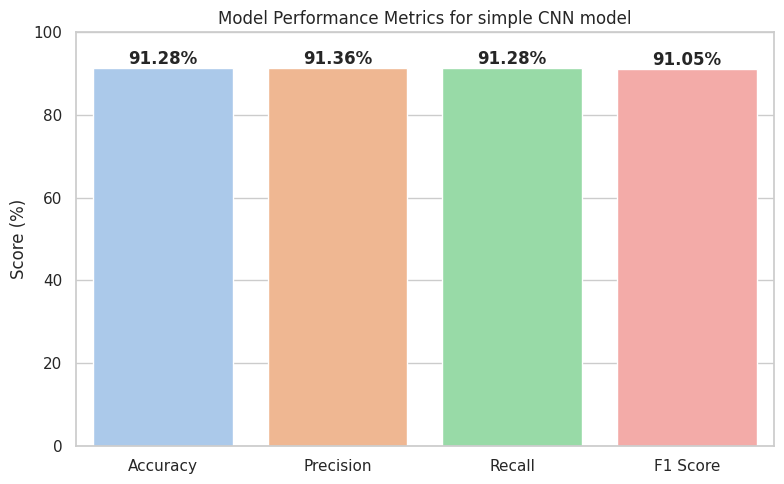

In [ ]:

#TO EVALUATE THE MODEL AND FIND THE ACCURACY PRECISION  RECALL AND F1_SCORE

model.eval()

#To creating the list for both predictions and lables
all_preds = []
all_labels = []

# Disable gradient calculation for inference
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


# Set seaborn style for clean plots
sns.set(style="whitegrid")

# Metric values (scaled to percentage)
metrics = {
    'Accuracy': accuracy * 100,
    'Precision': precision * 100,
    'Recall': recall * 100,
    'F1 Score': f1 * 100
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')

# Add value labels on top of bars
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
#labl=el and title
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.title('Model Performance Metrics for simple CNN model')
plt.tight_layout()
plt.show()

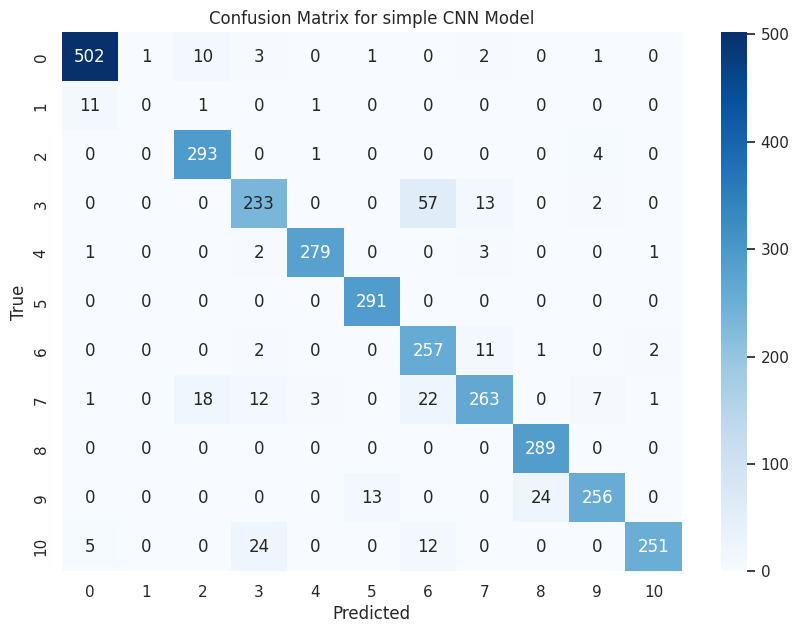

In [ ]:
#CONFUSION MATRIX FOR SIMPLE CNN MODEL
# Get predictions on the test set
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for simple CNN Model')
plt.show()


In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'cnn_model_dict.pth')
print("CNN Model dictionary saved successfully!")

# Save the entire model
torch.save(model, 'cnn_model.pth')
print("CNN Model  saved successfully!")


CNN Model dictionary saved successfully!
CNN Model  saved successfully!


In [ ]:





#To save it to Google Drive:


from google.colab import drive
drive.mount('/content/drive')

# Save the model to Google Drive
torch.save(model, '/content/drive/My Drive/cnn_model.pth')
torch.save(model.state_dict(), '/content/drive/My Drive/cnn_model_dict.pth')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the pretrained model
vgg16 = models.vgg16(pretrained=True)


# Freeze all layers in the feature extraction part
for param in vgg16.features.parameters():
    param.requires_grad = False

# Get number of input features for the last FC layer
num_features = vgg16.classifier[6].in_features

# Replace the last FC layer
vgg16.classifier[6] = nn.Linear(num_features, 11)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 89.8MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (18): ReLU(inplace=True)
    (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (20): ReLU(inplace=True)
    (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (22): ReLU(inplace=True)
    (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (25): ReLU(inplace=True)
    (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (27): ReLU(inplace=True)
    (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (29): ReLU(inplace=True)
    (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
  
  ****
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
  ) ****
)


In [ ]:
# WE CAN ADD FEW LINEAR LAYERS AND DROUPOUT AND ACTIVATION FUNCTION TO THE PRE TRAINED MODEL
vgg16.classifier = nn.Sequential(
     # First fully connected layer (from flattened input size 25088)
    nn.Linear(25088, 4096),
    #Relu activation function
    nn.ReLU(True),
    #droupout for regularation
    nn.Dropout(),
     #second linear layer with size 4096
    nn.Linear(4096, 1024),
    #Relu activation function
    nn.ReLU(True),
    # droupout for regurlation
    nn.Dropout(),
    #final layer with 11 classes
    nn.Linear(1024, 11)  # 11 output classes
)

# Check if CUDA (GPU) is available and select device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#move the model to selected device either cpu or gpu
vgg16 = vgg16.to(device)


In [ ]:
# Set up loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier.parameters(), lr=0.0001)


In [ ]:
#To create the function for training and validation
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=10):
    model.to(device)

    #using for loop epochs
    for epoch in range(epochs):
        print(f"\nEpoch [{epoch+1}/{epochs}]")
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.2f}%")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100 * val_correct / val_total
        print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.2f}%")



    print("Training complete.")


In [ ]:
#CALL THE FUNCTION TO TRAIN THE MODEL
train_model(vgg16, train_loader, val_loader, criterion, optimizer, device, epochs=20)


Epoch [1/20]


100%|██████████| 195/195 [00:41<00:00,  4.65it/s]

Train Loss: 0.5167 | Train Accuracy: 83.37%


Val Loss: 0.1248 | Val Accuracy: 96.15%

Epoch [2/20]


100%|██████████| 195/195 [00:41<00:00,  4.65it/s]

Train Loss: 0.1214 | Train Accuracy: 95.95%


Val Loss: 0.0806 | Val Accuracy: 97.44%

Epoch [3/20]


100%|██████████| 195/195 [00:42<00:00,  4.63it/s]

Train Loss: 0.0897 | Train Accuracy: 97.03%


Val Loss: 0.0966 | Val Accuracy: 96.79%

Epoch [4/20]


100%|██████████| 195/195 [00:41<00:00,  4.71it/s]

Train Loss: 0.0558 | Train Accuracy: 97.91%


Val Loss: 0.0413 | Val Accuracy: 98.35%

Epoch [5/20]


100%|██████████| 195/195 [00:41<00:00,  4.71it/s]

Train Loss: 0.0546 | Train Accuracy: 98.17%


Val Loss: 0.0304 | Val Accuracy: 98.90%

Epoch [6/20]


100%|██████████| 195/195 [00:42<00:00,  4.58it/s]

Train Loss: 0.0444 | Train Accuracy: 98.51%


Val Loss: 0.0877 | Val Accuracy: 97.44%

Epoch [7/20]


100%|██████████| 195/195 [00:41<00:00,  4.69it/s]

Train Loss: 0.0604 | Train Accuracy: 97.91%


Val Loss: 0.0364 | Val Accuracy: 98.63%

Epoch [8/20]


100%|██████████| 195/195 [00:40<00:00,  4.76it/s]

Train Loss: 0.0389 | Train Accuracy: 98.62%


Val Loss: 0.0359 | Val Accuracy: 99.18%

Epoch [9/20]


100%|██████████| 195/195 [00:40<00:00,  4.76it/s]

Train Loss: 0.0338 | Train Accuracy: 98.73%


Val Loss: 0.0420 | Val Accuracy: 98.99%

Epoch [10/20]


100%|██████████| 195/195 [00:41<00:00,  4.76it/s]

Train Loss: 0.0330 | Train Accuracy: 98.80%


Val Loss: 0.0607 | Val Accuracy: 98.08%

Epoch [11/20]


100%|██████████| 195/195 [00:41<00:00,  4.69it/s]

Train Loss: 0.0397 | Train Accuracy: 98.75%


Val Loss: 0.0210 | Val Accuracy: 99.27%

Epoch [12/20]


100%|██████████| 195/195 [00:41<00:00,  4.69it/s]

Train Loss: 0.0220 | Train Accuracy: 99.31%


Val Loss: 0.0979 | Val Accuracy: 97.16%

Epoch [13/20]


100%|██████████| 195/195 [00:40<00:00,  4.79it/s]

Train Loss: 0.0448 | Train Accuracy: 98.65%


Val Loss: 0.0615 | Val Accuracy: 98.81%

Epoch [14/20]


100%|██████████| 195/195 [00:41<00:00,  4.74it/s]

Train Loss: 0.0378 | Train Accuracy: 98.73%


Val Loss: 0.0496 | Val Accuracy: 98.81%

Epoch [15/20]


100%|██████████| 195/195 [00:41<00:00,  4.71it/s]

Train Loss: 0.0289 | Train Accuracy: 99.13%


Val Loss: 0.0186 | Val Accuracy: 99.36%

Epoch [16/20]


100%|██████████| 195/195 [00:41<00:00,  4.72it/s]

Train Loss: 0.0268 | Train Accuracy: 99.15%


Val Loss: 0.0318 | Val Accuracy: 99.08%

Epoch [17/20]


100%|██████████| 195/195 [00:41<00:00,  4.70it/s]

Train Loss: 0.0464 | Train Accuracy: 98.62%


Val Loss: 0.0202 | Val Accuracy: 99.18%

Epoch [18/20]


100%|██████████| 195/195 [00:41<00:00,  4.71it/s]

Train Loss: 0.0204 | Train Accuracy: 99.37%


Val Loss: 0.0535 | Val Accuracy: 99.36%

Epoch [19/20]


100%|██████████| 195/195 [00:41<00:00,  4.72it/s]

Train Loss: 0.0235 | Train Accuracy: 99.26%


Val Loss: 0.0254 | Val Accuracy: 98.81%

Epoch [20/20]


100%|██████████| 195/195 [00:41<00:00,  4.66it/s]

Train Loss: 0.0303 | Train Accuracy: 99.10%


Val Loss: 0.0716 | Val Accuracy: 98.72%
Training complete.


✅

Peak Validation Accuracy: 99.36%

General Trend: Model converged quickly (by Epoch 2), maintained high performance through 20 epochs.



Epoch 11: Highest Val Accuracy (99.36%)  and  very low loss Val Loss: 0.0186

Epoch 12:Highest training Accuracy  99.37% and very low loss Training Loss:
0.0204


[VGG16] Accuracy: 98.84%
[VGG16] Precision: 98.79%
[VGG16] Recall: 98.84%
[VGG16] F1 Score: 98.75%


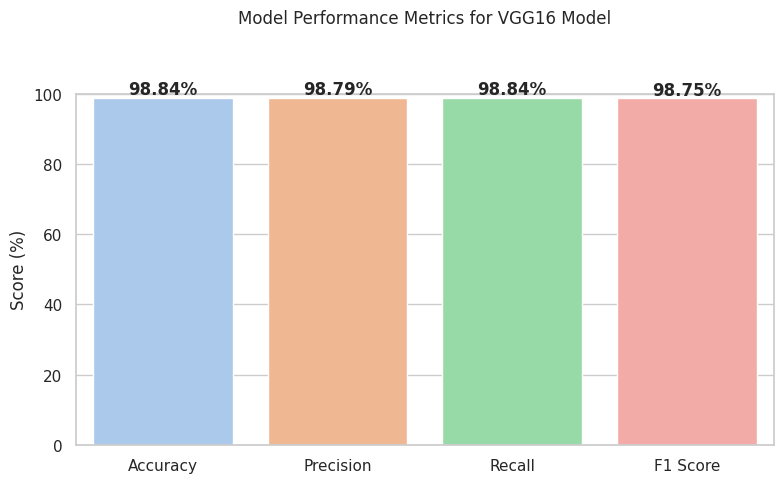

In [ ]:
#EVALUATE THE PRE TRAINED MODEL VGG16 for ACCURACY PRECISION RECALL AND F1_SCORE
# Set model to evaluation mode
vgg16.eval()

# Lists for storing predictions and labels
all_preds_vgg = []
all_labels_vgg = []

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs, 1)

        all_preds_vgg.extend(predicted.cpu().numpy())
        all_labels_vgg.extend(labels.cpu().numpy())

# Compute metrics
accuracy_vgg = accuracy_score(all_labels_vgg, all_preds_vgg)
precision_vgg = precision_score(all_labels_vgg, all_preds_vgg, average='weighted', zero_division=0)
recall_vgg = recall_score(all_labels_vgg, all_preds_vgg, average='weighted', zero_division=0)
f1_vgg = f1_score(all_labels_vgg, all_preds_vgg, average='weighted', zero_division=0)
#print the compute metrices
print(f"[VGG16] Accuracy: {accuracy_vgg * 100:.2f}%")
print(f"[VGG16] Precision: {precision_vgg * 100:.2f}%")
print(f"[VGG16] Recall: {recall_vgg * 100:.2f}%")
print(f"[VGG16] F1 Score: {f1_vgg * 100:.2f}%")

# Plotting the performance metrics for VGG16
sns.set(style="whitegrid")
#metrice with percentage
metrics_vgg = {
    'Accuracy': accuracy_vgg * 100,
    'Precision': precision_vgg * 100,
    'Recall': recall_vgg * 100,
    'F1 Score': f1_vgg * 100
}
#to visulazie the plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics_vgg.keys()), y=list(metrics_vgg.values()), palette='pastel')
#to iterate both
for i, v in enumerate(metrics_vgg.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
#To set the label
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.title('Model Performance Metrics for VGG16 Model\n\n\n')
plt.tight_layout()
plt.show()

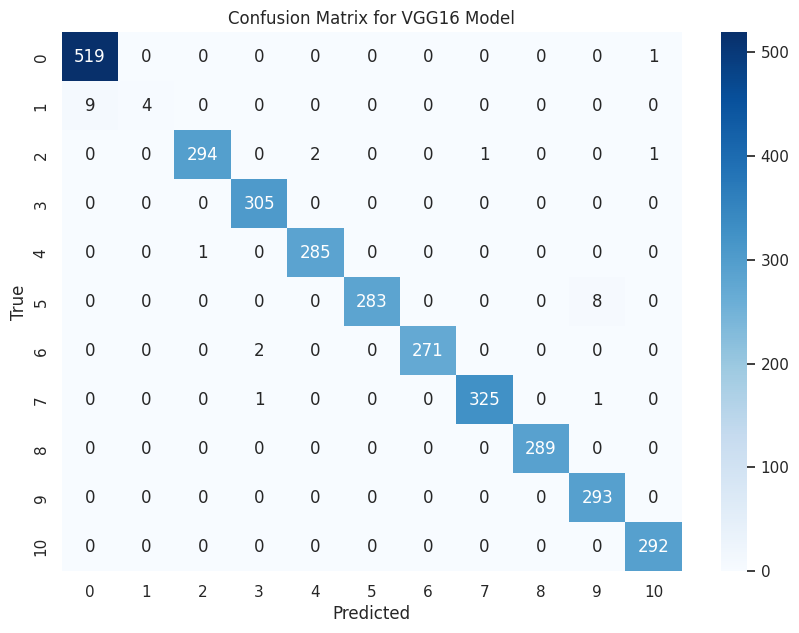

In [ ]:
#EVALUATE THE VGG16 PRETRAINED MODEL FOR CONFUSION MATRIX
# Set model to eval mode
vgg16.eval()

# Lists to store all predictions and true labels
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate confusion matrix
cm_vgg16 = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_vgg16, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for VGG16 Model')
plt.show()

In [ ]:
# Save the trained model
torch.save(vgg16.state_dict(), 'vgg16_model_dict.pth')
print("vgg16 Model dictionary saved successfully!")

# Save the entire model
torch.save(vgg16, 'vgg16_model.pth')
print("vgg16 Model  saved successfully!")




#To save it to Google Drive:




# Save the model to Google Drive

torch.save(vgg16.state_dict(), '/content/drive/My Drive/vgg16_model_dict.pth')
torch.save(vgg16, '/content/drive/My Drive/vgg16_model.pth')





vgg16 Model dictionary saved successfully!
vgg16 Model  saved successfully!


In [ ]:
#LOAD THE PRETRAINED MODEL ResNet50
# Load the pretrained ResNet50 model
resnet50 = models.resnet50(pretrained=True)

# Freeze the convolutional base
for param in resnet50.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
num_features = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_features, 11)  # For 11 classes

for param in resnet50.fc.parameters():
    param.requires_grad = True


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 184MB/s]


RESNET50
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
……………
(avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear(in_features=2048, out_features=11, bias=True)
)



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#move the model to selected device either cpu or gpu
resnet50 = resnet50.to(device)

In [ ]:
# Loss function
criterion = nn.CrossEntropyLoss()
# Optimizer (updating all layers of ResNet50)
optimizer = optim.Adam(resnet50.fc.parameters(), lr=0.0001)


In [ ]:
#call the function
train_model(resnet50, train_loader, val_loader, criterion, optimizer, device, epochs=20)



Epoch [1/20]


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]

Train Loss: 1.8023 | Train Accuracy: 51.84%


Val Loss: 1.3249 | Val Accuracy: 81.59%

Epoch [2/20]


100%|██████████| 195/195 [00:36<00:00,  5.35it/s]

Train Loss: 1.1170 | Train Accuracy: 86.94%


Val Loss: 0.8839 | Val Accuracy: 91.48%

Epoch [3/20]


100%|██████████| 195/195 [00:35<00:00,  5.46it/s]

Train Loss: 0.7923 | Train Accuracy: 91.34%


Val Loss: 0.6809 | Val Accuracy: 91.48%

Epoch [4/20]


100%|██████████| 195/195 [00:35<00:00,  5.44it/s]

Train Loss: 0.6186 | Train Accuracy: 93.25%


Val Loss: 0.5359 | Val Accuracy: 94.05%

Epoch [5/20]


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]

Train Loss: 0.5051 | Train Accuracy: 94.46%


Val Loss: 0.4531 | Val Accuracy: 93.77%

Epoch [6/20]


100%|██████████| 195/195 [00:37<00:00,  5.25it/s]

Train Loss: 0.4214 | Train Accuracy: 94.97%


Val Loss: 0.3727 | Val Accuracy: 95.79%

Epoch [7/20]


100%|██████████| 195/195 [00:36<00:00,  5.31it/s]


Train Loss: 0.3757 | Train Accuracy: 95.20%
Val Loss: 0.3201 | Val Accuracy: 95.24%

Epoch [8/20]


100%|██████████| 195/195 [00:36<00:00,  5.28it/s]

Train Loss: 0.3331 | Train Accuracy: 95.66%


Val Loss: 0.2921 | Val Accuracy: 95.79%

Epoch [9/20]


100%|██████████| 195/195 [00:36<00:00,  5.37it/s]

Train Loss: 0.2989 | Train Accuracy: 95.79%


Val Loss: 0.2669 | Val Accuracy: 95.70%

Epoch [10/20]


100%|██████████| 195/195 [00:35<00:00,  5.48it/s]


Train Loss: 0.2719 | Train Accuracy: 96.26%
Val Loss: 0.2383 | Val Accuracy: 95.51%

Epoch [11/20]


100%|██████████| 195/195 [00:35<00:00,  5.45it/s]

Train Loss: 0.2520 | Train Accuracy: 96.10%


Val Loss: 0.2260 | Val Accuracy: 95.97%

Epoch [12/20]


100%|██████████| 195/195 [00:36<00:00,  5.30it/s]

Train Loss: 0.2308 | Train Accuracy: 96.51%


Val Loss: 0.1931 | Val Accuracy: 96.89%

Epoch [13/20]


100%|██████████| 195/195 [00:36<00:00,  5.29it/s]

Train Loss: 0.2129 | Train Accuracy: 96.69%


Val Loss: 0.1834 | Val Accuracy: 96.98%

Epoch [14/20]


100%|██████████| 195/195 [00:36<00:00,  5.35it/s]

Train Loss: 0.2015 | Train Accuracy: 96.77%


Val Loss: 0.1811 | Val Accuracy: 96.61%

Epoch [15/20]


100%|██████████| 195/195 [00:36<00:00,  5.29it/s]

Train Loss: 0.1914 | Train Accuracy: 96.76%


Val Loss: 0.1740 | Val Accuracy: 97.07%

Epoch [16/20]


100%|██████████| 195/195 [00:36<00:00,  5.36it/s]

Train Loss: 0.1818 | Train Accuracy: 97.09%


Val Loss: 0.1547 | Val Accuracy: 97.34%

Epoch [17/20]


100%|██████████| 195/195 [00:36<00:00,  5.42it/s]

Train Loss: 0.1676 | Train Accuracy: 97.51%


Val Loss: 0.1464 | Val Accuracy: 96.89%

Epoch [18/20]


100%|██████████| 195/195 [00:37<00:00,  5.13it/s]

Train Loss: 0.1617 | Train Accuracy: 97.17%


Val Loss: 0.1431 | Val Accuracy: 97.62%

Epoch [19/20]


100%|██████████| 195/195 [00:37<00:00,  5.23it/s]

Train Loss: 0.1525 | Train Accuracy: 97.43%


Val Loss: 0.1306 | Val Accuracy: 97.25%

Epoch [20/20]


100%|██████████| 195/195 [00:37<00:00,  5.25it/s]

Train Loss: 0.1487 | Train Accuracy: 97.54%


Val Loss: 0.1344 | Val Accuracy: 97.44%
Training complete.


Overall Performance Summary ResNet50 Results:
Best Train Accuracy:97.54%(EPOCH 20)



Best Val Accuracy: 97.62% (Epochs 18)

Val Loss Trend: Consistently decreasing, smooth learning



🔍 Key Observations:

Metric	VGG16	ResNet50

Stability--	Minor fluctuation	Smooth
Overfitting Risk	Slight	Low

[ResNet50] Accuracy: 98.18%
[ResNet50] Precision: 98.19%
[ResNet50] Recall: 98.18%
[ResNet50] F1 Score: 98.13%


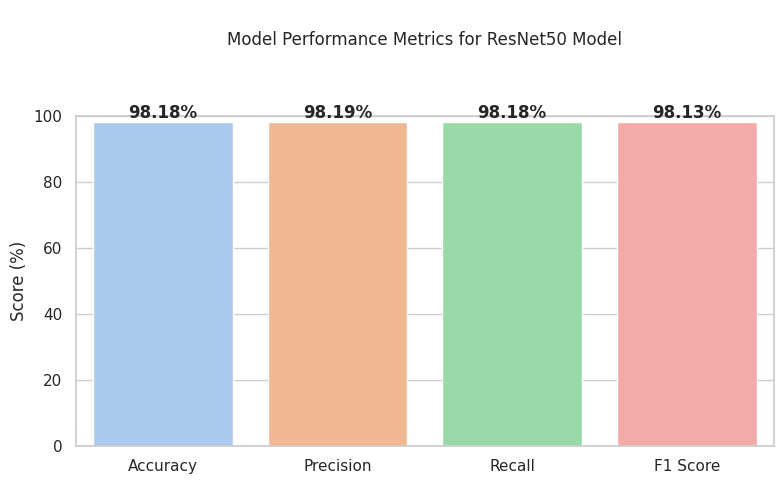

In [ ]:
#EVALUATE THE resnet50 MODEL FOR ACCURACY,PRECISION,F1_SCORE
# Set model to evaluation mode
resnet50.eval()

# Lists for storing predictions and labels
all_preds_resnet = []
all_labels_resnet = []

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet50(images)
        _, predicted = torch.max(outputs, 1)

        all_preds_resnet.extend(predicted.cpu().numpy())
        all_labels_resnet.extend(labels.cpu().numpy())

# Compute metrics
accuracy_resnet = accuracy_score(all_labels_resnet, all_preds_resnet)
precision_resnet = precision_score(all_labels_resnet, all_preds_resnet, average='weighted', zero_division=0)
recall_resnet = recall_score(all_labels_resnet, all_preds_resnet, average='weighted', zero_division=0)
f1_resnet = f1_score(all_labels_resnet, all_preds_resnet, average='weighted', zero_division=0)
#printcompute metrics
print(f"[ResNet50] Accuracy: {accuracy_resnet * 100:.2f}%")
print(f"[ResNet50] Precision: {precision_resnet * 100:.2f}%")
print(f"[ResNet50] Recall: {recall_resnet * 100:.2f}%")
print(f"[ResNet50] F1 Score: {f1_resnet * 100:.2f}%")

# Plotting the performance metrics for ResNet50
sns.set(style="whitegrid")
#metrics with percentage
metrics_resnet = {
    'Accuracy': accuracy_resnet * 100,
    'Precision': precision_resnet * 100,
    'Recall': recall_resnet * 100,
    'F1 Score': f1_resnet * 100
}
#To visulation
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics_resnet.keys()), y=list(metrics_resnet.values()), palette='pastel')
#To iterate
for i, v in enumerate(metrics_resnet.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
#for label
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.title('\nModel Performance Metrics for ResNet50 Model\n\n\n')
plt.tight_layout()
plt.show()

RESNET50 MODEL
ACCURACY         98.18%
PRECISION        98.19%
RECALL           98.18%
F1_SCORE         98.13%

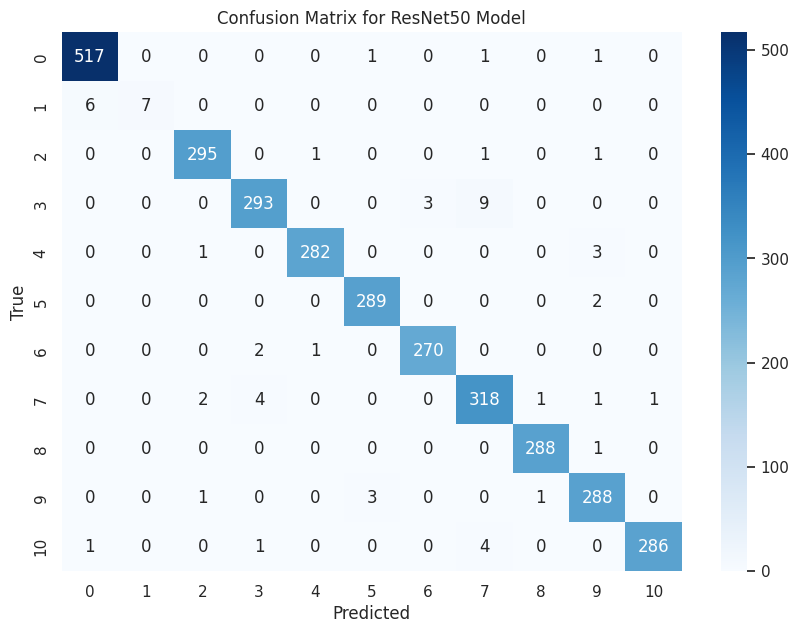

In [ ]:
#CONFUSION MATRIX FOR  resnet50 MODEL
# Set model to eval mode
resnet50.eval()

# Lists to store all predictions and true labels
all_preds_resnet = []
all_labels_resnet = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet50(images)
        _, preds = torch.max(outputs, 1)

        all_preds_resnet.extend(preds.cpu().numpy())
        all_labels_resnet.extend(labels.cpu().numpy())

# Generate confusion matrix
cm_resnet = confusion_matrix(all_labels_resnet, all_preds_resnet)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for ResNet50 Model')
plt.show()

In [ ]:
# Save the trained ResNet50 model



In [ ]:
# Save the trained model
torch.save(resnet50.state_dict(), 'resnet50_model_dict.pth')
print("ResNet50 model dictionary saved successfully!")

# Save the entire model
torch.save(resnet50, 'resnet50_model.pth')
print("resnet50 Model  saved successfully!")




# Save the model to Google Drive

torch.save(resnet50.state_dict(), '/content/drive/My Drive/resnet50_model_dict.pth')
torch.save(resnet50, '/content/drive/My Drive/resnet50_model.pth')





ResNet50 model dictionary saved successfully!
resnet50 Model  saved successfully!


                                        **PRETRAINED MODEL MOBILENET**

In [ ]:
#To download the model
mobilenet = models.mobilenet_v2(pretrained=True)

# Freeze all feature extractor layers
for param in mobilenet.features.parameters():
    param.requires_grad = False

# Replace the classifier to match your 11 output classes
num_features = mobilenet.classifier[1].in_features
mobilenet.classifier[1] = nn.Linear(num_features, 11)



Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 144MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
………………………………………………………..

(classifier): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=1280, out_features=1000, bias=True)
  )
)


In [ ]:
#To intilaze the loss funtion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mobilenet.classifier.parameters(), lr=0.0001)


In [ ]:
#To call the function for mobilenet model
train_model(mobilenet, train_loader, val_loader, criterion, optimizer, device, epochs=20)




Epoch [1/20]


100%|██████████| 195/195 [00:35<00:00,  5.52it/s]

Train Loss: 1.7987 | Train Accuracy: 46.63%


Val Loss: 1.3401 | Val Accuracy: 82.14%

Epoch [2/20]


100%|██████████| 195/195 [00:33<00:00,  5.78it/s]

Train Loss: 1.1113 | Train Accuracy: 83.34%


Val Loss: 0.8877 | Val Accuracy: 90.20%

Epoch [3/20]


100%|██████████| 195/195 [00:33<00:00,  5.86it/s]

Train Loss: 0.7971 | Train Accuracy: 90.01%


Val Loss: 0.6720 | Val Accuracy: 91.67%

Epoch [4/20]


100%|██████████| 195/195 [00:34<00:00,  5.63it/s]

Train Loss: 0.6273 | Train Accuracy: 91.55%


Val Loss: 0.5162 | Val Accuracy: 93.86%

Epoch [5/20]


100%|██████████| 195/195 [00:35<00:00,  5.57it/s]

Train Loss: 0.5224 | Train Accuracy: 92.98%


Val Loss: 0.4386 | Val Accuracy: 95.51%

Epoch [6/20]


100%|██████████| 195/195 [00:34<00:00,  5.71it/s]

Train Loss: 0.4403 | Train Accuracy: 93.75%


Val Loss: 0.3799 | Val Accuracy: 94.87%

Epoch [7/20]


100%|██████████| 195/195 [00:33<00:00,  5.84it/s]

Train Loss: 0.3829 | Train Accuracy: 94.88%


Val Loss: 0.3286 | Val Accuracy: 96.79%

Epoch [8/20]


100%|██████████| 195/195 [00:33<00:00,  5.84it/s]

Train Loss: 0.3399 | Train Accuracy: 95.18%


Val Loss: 0.2847 | Val Accuracy: 96.70%

Epoch [9/20]


100%|██████████| 195/195 [00:33<00:00,  5.81it/s]

Train Loss: 0.3080 | Train Accuracy: 95.33%


Val Loss: 0.2708 | Val Accuracy: 96.15%

Epoch [10/20]


100%|██████████| 195/195 [00:34<00:00,  5.67it/s]

Train Loss: 0.2848 | Train Accuracy: 95.61%


Val Loss: 0.2527 | Val Accuracy: 96.52%

Epoch [11/20]


100%|██████████| 195/195 [00:33<00:00,  5.75it/s]

Train Loss: 0.2549 | Train Accuracy: 95.86%


Val Loss: 0.2152 | Val Accuracy: 96.98%

Epoch [12/20]


100%|██████████| 195/195 [00:33<00:00,  5.78it/s]

Train Loss: 0.2387 | Train Accuracy: 95.97%


Val Loss: 0.1851 | Val Accuracy: 97.71%

Epoch [13/20]


100%|██████████| 195/195 [00:33<00:00,  5.87it/s]

Train Loss: 0.2244 | Train Accuracy: 96.32%


Val Loss: 0.1805 | Val Accuracy: 97.44%

Epoch [14/20]


100%|██████████| 195/195 [00:33<00:00,  5.83it/s]

Train Loss: 0.2194 | Train Accuracy: 95.84%


Val Loss: 0.1717 | Val Accuracy: 97.99%

Epoch [15/20]


100%|██████████| 195/195 [00:33<00:00,  5.83it/s]

Train Loss: 0.1973 | Train Accuracy: 96.39%


Val Loss: 0.1607 | Val Accuracy: 97.16%

Epoch [16/20]


100%|██████████| 195/195 [00:33<00:00,  5.83it/s]

Train Loss: 0.1911 | Train Accuracy: 96.32%


Val Loss: 0.1511 | Val Accuracy: 97.25%

Epoch [17/20]


100%|██████████| 195/195 [00:34<00:00,  5.69it/s]

Train Loss: 0.1782 | Train Accuracy: 96.92%


Val Loss: 0.1376 | Val Accuracy: 98.17%

Epoch [18/20]


100%|██████████| 195/195 [00:34<00:00,  5.61it/s]

Train Loss: 0.1747 | Train Accuracy: 96.59%


Val Loss: 0.1234 | Val Accuracy: 98.35%

Epoch [19/20]


100%|██████████| 195/195 [00:35<00:00,  5.50it/s]

Train Loss: 0.1639 | Train Accuracy: 96.92%


Val Loss: 0.1248 | Val Accuracy: 98.35%

Epoch [20/20]


100%|██████████| 195/195 [00:33<00:00,  5.81it/s]

Train Loss: 0.1510 | Train Accuracy: 97.20%


Val Loss: 0.1146 | Val Accuracy: 98.35%
Training complete.


🔍Performance_Insights for mobilenet model
Epoch	Train Acc	Val Acc	Train Loss	Val Loss

Epoch 1:  high loss.

Train Loss: 1.7987 | Train Accuracy: 46.63%

Val Loss: 1.3401 | Val Accuracy: 82.14%


Epoch 10: loss decreases.
Train Loss: 0.2848 | Train Accuracy: 95.61%

Val Loss: 0.2527 | Val Accuracy: 96.52%



Epoch 20:  very low loss.


Train Loss: 0.1510 | Train Accuracy: 97.20%

Val Loss: 0.1146 | Val Accuracy: 98.35%



The model is improving steadily.

[MobileNet] Accuracy: 98.53%
[MobileNet] Precision: 98.50%
[MobileNet] Recall: 98.53%
[MobileNet] F1 Score: 98.47%


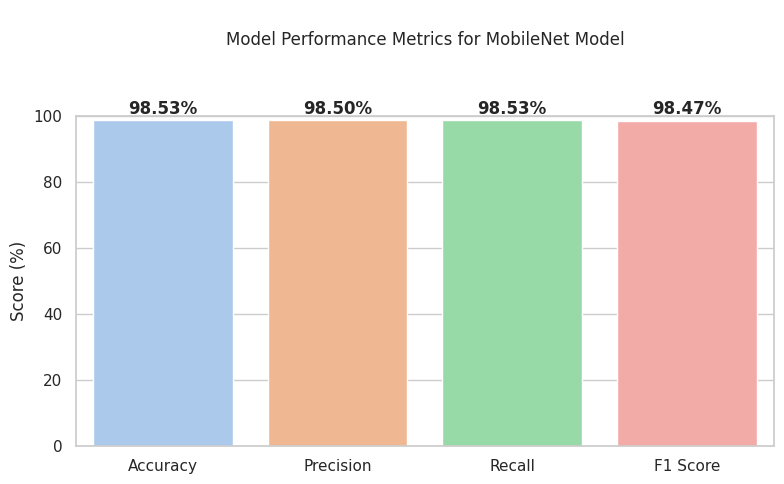

In [ ]:
#EVALUATE THE MOBILENET MODEL FOR ACCURACY PRECISION AND F1_SCORE
# Set model to evaluation mode
mobilenet.eval()

# Lists for storing predictions and labels
all_preds_mobilenet = []
all_labels_mobilenet = []

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = mobilenet(images)
        _, predicted = torch.max(outputs, 1)

        all_preds_mobilenet.extend(predicted.cpu().numpy())
        all_labels_mobilenet.extend(labels.cpu().numpy())

# Compute metrics
accuracy_mobilenet = accuracy_score(all_labels_mobilenet, all_preds_mobilenet)
precision_mobilenet = precision_score(all_labels_mobilenet, all_preds_mobilenet, average='weighted', zero_division=0)
recall_mobilenet = recall_score(all_labels_mobilenet, all_preds_mobilenet, average='weighted', zero_division=0)
f1_mobilenet = f1_score(all_labels_mobilenet, all_preds_mobilenet, average='weighted', zero_division=0)
#print the result
print(f"[MobileNet] Accuracy: {accuracy_mobilenet * 100:.2f}%")
print(f"[MobileNet] Precision: {precision_mobilenet * 100:.2f}%")
print(f"[MobileNet] Recall: {recall_mobilenet * 100:.2f}%")
print(f"[MobileNet] F1 Score: {f1_mobilenet * 100:.2f}%")

# Plotting the performance metrics for MobileNet
sns.set(style="whitegrid")

metrics_mobilenet = {
    'Accuracy': accuracy_mobilenet * 100,
    'Precision': precision_mobilenet * 100,
    'Recall': recall_mobilenet * 100,
    'F1 Score': f1_mobilenet * 100
}
#To visulazie
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics_mobilenet.keys()), y=list(metrics_mobilenet.values()), palette='pastel')
#to iterate
for i, v in enumerate(metrics_mobilenet.values()):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center', fontweight='bold')
#for label
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.title('\nModel Performance Metrics for MobileNet Model\n\n\n')
plt.tight_layout()
plt.show()

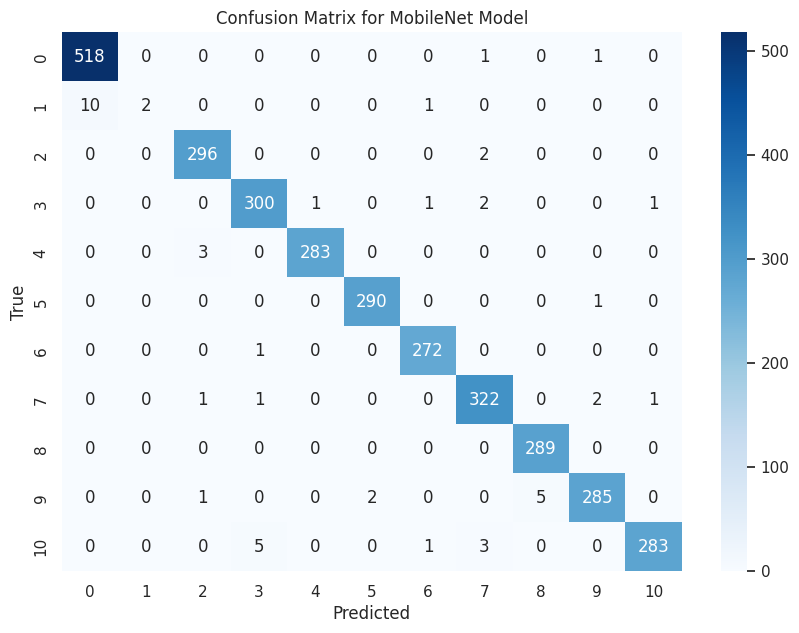

In [ ]:
#CONFUSION MATRIX FOR MOBILENET MODEL
# Set model to eval mode
mobilenet.eval()

# Lists to store all predictions and true labels
all_preds_mobilenet = []
all_labels_mobilenet = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = mobilenet(images)
        _, preds = torch.max(outputs, 1)

        all_preds_mobilenet.extend(preds.cpu().numpy())
        all_labels_mobilenet.extend(labels.cpu().numpy())

# Generate confusion matrix
cm_mobilenet = confusion_matrix(all_labels_mobilenet, all_preds_mobilenet)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_mobilenet, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MobileNet Model')
plt.show()

In [ ]:
# Save the trained model
torch.save(mobilenet.state_dict(), 'mobilenet_model_dict.pth')
print("(mobilenet model dictionary saved successfully!")

# Save the entire model
torch.save(mobilenet, 'mobilenet_model.pth')
print("(mobilenet Model  saved successfully!")




# Save the model to Google Drive

torch.save(mobilenet.state_dict(),'/content/drive/My Drive/mobilenet_model_dict.pth')
torch.save(mobilenet, '/content/drive/My Drive/mobilenet_model.pth')


(mobilenet model dictionary saved successfully!
(mobilenet Model  saved successfully!


                                      ** PRETRAINED MODEL          INCEPTION V3**

In [ ]:
# Load the pretrained InceptionV3 model
inceptionv3 = models.inception_v3(pretrained=True)

# Freeze all layers except the final fully connected layers
for param in inceptionv3.parameters():
    param.requires_grad = False

# InceptionV3 has two fully connected layers: one for classification (auxiliary output) and one for the main output
# Modify the main classification layer
num_features = inceptionv3.fc.in_features
inceptionv3.fc = nn.Linear(num_features, 11)  # For 11 classes, adjust based on your task

# InceptionV3 also has an auxiliary output that we can modify similarly if needed
num_aux_features = inceptionv3.AuxLogits.fc.in_features
inceptionv3.AuxLogits.fc = nn.Linear(num_aux_features, 11)  # Modify the auxiliary output to match 11 classes

# Optionally, you can enable gradients for the final fully connected layers
for param in inceptionv3.fc.parameters():
    param.requires_grad = True
for param in inceptionv3.AuxLogits.fc.parameters():
    param.requires_grad = True


Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 189MB/s] 


Inception3


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
………………………………………………………

(AuxLogits): InceptionAux(
    (conv0): BasicConv2d(
      (conv): Conv2d(768, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv1): BasicConv2d(
      (conv): Conv2d(128, 768, kernel_size=(5, 5), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(768, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
   ** (fc): Linear(in_features=768, out_features=11, bias=True)** **bold text**
  )

.....................

(avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
  (dropout): Dropout(p=0.5, inplace=False)
  **(fc): Linear(in_features=2048, out_features=1000, bias=True)**
)


In [ ]:
#to check the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#move the model to device
inceptionv3.to(device)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(inceptionv3.parameters(), lr=0.0001)

In [ ]:
# Define transformation pipeline
transform_inve3 = transforms.Compose([
    transforms.Resize((299, 299)),             # Resize image to 299x299 for InceptionV3
    transforms.RandomHorizontalFlip(p=0.5),    # Randomly flip image horizontally
    transforms.RandomRotation(degrees=15),     # Random rotation between -15 to 15 degrees
    transforms.RandomAffine(degrees=0,         # No additional rotation
                            scale=(0.9, 1.1)), # Random zoom between 90% and 110%
    transforms.ToTensor(),                     # Convert to tensor and rescale to [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize based on ImageNet statistics
])


In [ ]:
# Apply transform to the training dataset
train_dataset_inv = datasets.ImageFolder(root="/content/drive/MyDrive/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train", transform=transform_inve3)

# Create DataLoader for batch processing
train_loader_inv = DataLoader(train_dataset_inv, batch_size=32, shuffle=True,num_workers=2,pin_memory=True)

In [ ]:
# Apply transform to the validation dataset
val_dataset_inv = datasets.ImageFolder(root="/content/drive/MyDrive/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val", transform=transform_inve3)

# Create DataLoader for validation
val_loader_inv = DataLoader(val_dataset_inv, batch_size=32, shuffle=False,num_workers=2,pin_memory=True)


In [ ]:
# Apply transform to the testing dataset
test_dataset_inv = datasets.ImageFolder(root='/content/drive/MyDrive/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test', transform=transform_inve3)

# Create DataLoader for testing
test_loader_inv = DataLoader(test_dataset_inv, batch_size=32, shuffle=False,num_workers=2,pin_memory=True)


In [ ]:
# Corrected pre_train_model function
def pre_train_model(model, train_loader_inv, val_loader_inv, criterion, optimizer, device, epochs=10):
    model.to(device)

    for epoch in range(epochs):
        print(f"\nEpoch [{epoch+1}/{epochs}]")
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for images, labels in tqdm(train_loader_inv):  # <-- Use train_loader, not train_loader_inv
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)

            # Handle InceptionV3 output (main + auxiliary)
            if isinstance(outputs, tuple):
                logits, aux_logits = outputs
                loss1 = criterion(logits, labels)
                loss2 = criterion(aux_logits, labels)
                loss = loss1 + 0.4 * loss2  # Main loss + 0.4 * Auxiliary loss
            else:
                logits = outputs
                loss = criterion(logits, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(logits.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader_inv)
        train_acc = 100 * correct / total
        print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.2f}%")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader_inv:  # <-- Use val_loader, not val_loader_inv
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)

                if isinstance(outputs, tuple):
                    logits = outputs[0]  # Only main output for validation
                else:
                    logits = outputs

                loss = criterion(logits, labels)

                val_loss += loss.item()
                _, predicted = torch.max(logits.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader_inv)
        val_acc = 100 * val_correct / val_total
        print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.2f}%")

    print("Training complete.")
    #return model

In [ ]:
# Train the model
pre_train_model(inceptionv3, train_loader_inv, val_loader_inv, criterion, optimizer, device, epochs=20)



Epoch [1/20]


100%|██████████| 195/195 [00:48<00:00,  4.05it/s]

Train Loss: 2.7220 | Train Accuracy: 36.58%


Val Loss: 1.7209 | Val Accuracy: 69.51%

Epoch [2/20]


100%|██████████| 195/195 [00:46<00:00,  4.19it/s]

Train Loss: 1.9387 | Train Accuracy: 68.43%


Val Loss: 1.3198 | Val Accuracy: 88.55%

Epoch [3/20]


100%|██████████| 195/195 [00:47<00:00,  4.09it/s]

Train Loss: 1.4861 | Train Accuracy: 81.14%


Val Loss: 1.0662 | Val Accuracy: 91.21%

Epoch [4/20]


100%|██████████| 195/195 [00:48<00:00,  4.04it/s]

Train Loss: 1.2130 | Train Accuracy: 84.76%


Val Loss: 0.8944 | Val Accuracy: 90.02%

Epoch [5/20]


100%|██████████| 195/195 [00:48<00:00,  4.02it/s]

Train Loss: 1.0308 | Train Accuracy: 86.84%


Val Loss: 0.7622 | Val Accuracy: 90.48%

Epoch [6/20]


100%|██████████| 195/195 [00:48<00:00,  4.01it/s]

Train Loss: 0.9061 | Train Accuracy: 87.78%


Val Loss: 0.6503 | Val Accuracy: 92.03%

Epoch [7/20]


100%|██████████| 195/195 [00:48<00:00,  4.01it/s]

Train Loss: 0.7964 | Train Accuracy: 89.11%


Val Loss: 0.5823 | Val Accuracy: 92.31%

Epoch [8/20]


100%|██████████| 195/195 [00:48<00:00,  4.04it/s]

Train Loss: 0.7242 | Train Accuracy: 89.45%


Val Loss: 0.5344 | Val Accuracy: 93.04%

Epoch [9/20]


100%|██████████| 195/195 [00:47<00:00,  4.06it/s]

Train Loss: 0.6686 | Train Accuracy: 90.01%


Val Loss: 0.4733 | Val Accuracy: 93.50%

Epoch [10/20]


100%|██████████| 195/195 [00:47<00:00,  4.10it/s]

Train Loss: 0.6133 | Train Accuracy: 91.12%


Val Loss: 0.4482 | Val Accuracy: 94.60%

Epoch [11/20]


100%|██████████| 195/195 [00:47<00:00,  4.13it/s]

Train Loss: 0.5729 | Train Accuracy: 91.20%


Val Loss: 0.3983 | Val Accuracy: 95.42%

Epoch [12/20]


100%|██████████| 195/195 [00:49<00:00,  3.93it/s]

Train Loss: 0.5401 | Train Accuracy: 91.44%


Val Loss: 0.3783 | Val Accuracy: 94.23%

Epoch [13/20]


100%|██████████| 195/195 [00:47<00:00,  4.08it/s]

Train Loss: 0.5062 | Train Accuracy: 91.57%


Val Loss: 0.3623 | Val Accuracy: 94.41%

Epoch [14/20]


100%|██████████| 195/195 [00:48<00:00,  3.99it/s]

Train Loss: 0.4769 | Train Accuracy: 92.37%


Val Loss: 0.3308 | Val Accuracy: 94.78%

Epoch [15/20]


100%|██████████| 195/195 [00:49<00:00,  3.98it/s]

Train Loss: 0.4606 | Train Accuracy: 91.92%


Val Loss: 0.3055 | Val Accuracy: 94.69%

Epoch [16/20]


100%|██████████| 195/195 [00:48<00:00,  4.01it/s]

Train Loss: 0.4355 | Train Accuracy: 92.27%


Val Loss: 0.2871 | Val Accuracy: 96.06%

Epoch [17/20]


100%|██████████| 195/195 [00:59<00:00,  3.28it/s]

Train Loss: 0.4157 | Train Accuracy: 92.77%


Val Loss: 0.2658 | Val Accuracy: 96.61%

Epoch [18/20]


100%|██████████| 195/195 [00:57<00:00,  3.39it/s]

Train Loss: 0.3906 | Train Accuracy: 93.67%


Val Loss: 0.2485 | Val Accuracy: 96.15%

Epoch [19/20]


100%|██████████| 195/195 [00:50<00:00,  3.87it/s]

Train Loss: 0.3875 | Train Accuracy: 92.74%


Val Loss: 0.2635 | Val Accuracy: 95.88%

Epoch [20/20]


100%|██████████| 195/195 [00:48<00:00,  4.00it/s]

Train Loss: 0.3781 | Train Accuracy: 92.77%


Val Loss: 0.2420 | Val Accuracy: 96.52%
Training complete.


EPOCH 1:
Train Loss: 2.7220 | Train Accuracy: 36.58%

Val Loss: 1.7209 | Val Accuracy: 69.51%


EPOCH 10:
Train Loss: 0.6133 | Train Accuracy: 91.12%

Val Loss: 0.4482 | Val Accuracy: 94.60%



EPOCH 20:
Train Loss: 0.3781 | Train Accuracy: 92.77%

Val Loss: 0.2420 | Val Accuracy: 96.52%

BOTH TRAINING AND VALIDATION ACCURACY HAVE IMPROVED.

[InceptionV3] Accuracy: 97.14%
[InceptionV3] Precision: 97.16%
[InceptionV3] Recall: 97.14%
[InceptionV3] F1 Score: 97.01%


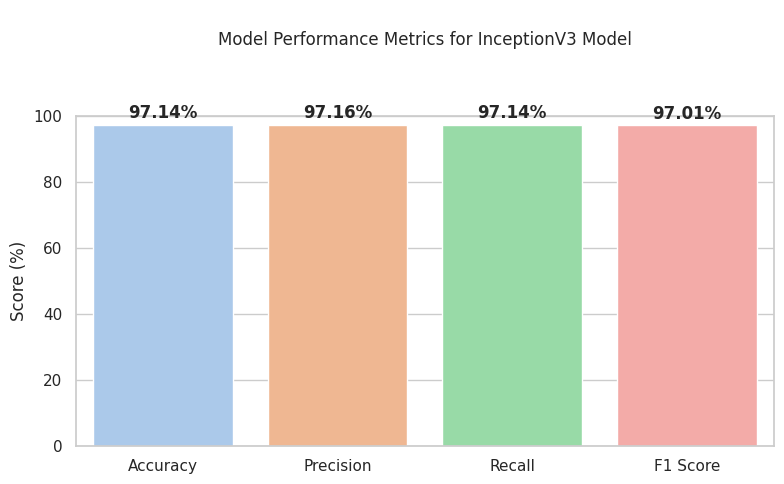

In [ ]:
#EVALUATE THE MODEL FOR ACCURACY PRECISION AND F1_SCORE
# Set model to evaluation mode
inceptionv3.eval()

# Lists for storing predictions and labels
all_preds_inceptionv3 = []
all_labels_inceptionv3 = []

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader_inv:  # <- use your test_loader for InceptionV3
        images, labels = images.to(device), labels.to(device)
        outputs = inceptionv3(images)

        # Handle InceptionV3 outputs
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # Use only the main output during testing

        _, predicted = torch.max(outputs, 1)

        all_preds_inceptionv3.extend(predicted.cpu().numpy())
        all_labels_inceptionv3.extend(labels.cpu().numpy())

# Compute metrics
accuracy_inceptionv3 = accuracy_score(all_labels_inceptionv3, all_preds_inceptionv3)
precision_inceptionv3 = precision_score(all_labels_inceptionv3, all_preds_inceptionv3, average='weighted', zero_division=0)
recall_inceptionv3 = recall_score(all_labels_inceptionv3, all_preds_inceptionv3, average='weighted', zero_division=0)
f1_inceptionv3 = f1_score(all_labels_inceptionv3, all_preds_inceptionv3, average='weighted', zero_division=0)

# Print the result
print(f"[InceptionV3] Accuracy: {accuracy_inceptionv3 * 100:.2f}%")
print(f"[InceptionV3] Precision: {precision_inceptionv3 * 100:.2f}%")
print(f"[InceptionV3] Recall: {recall_inceptionv3 * 100:.2f}%")
print(f"[InceptionV3] F1 Score: {f1_inceptionv3 * 100:.2f}%")

# Plotting the performance metrics for InceptionV3
sns.set(style="whitegrid")

metrics_inceptionv3 = {
    'Accuracy': accuracy_inceptionv3 * 100,
    'Precision': precision_inceptionv3 * 100,
    'Recall': recall_inceptionv3 * 100,
    'F1 Score': f1_inceptionv3 * 100
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics_inceptionv3.keys()), y=list(metrics_inceptionv3.values()), palette='pastel')

for i, v in enumerate(metrics_inceptionv3.values()):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center', fontweight='bold')

plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.title('\nModel Performance Metrics for InceptionV3 Model\n\n\n')
plt.tight_layout()
plt.show()



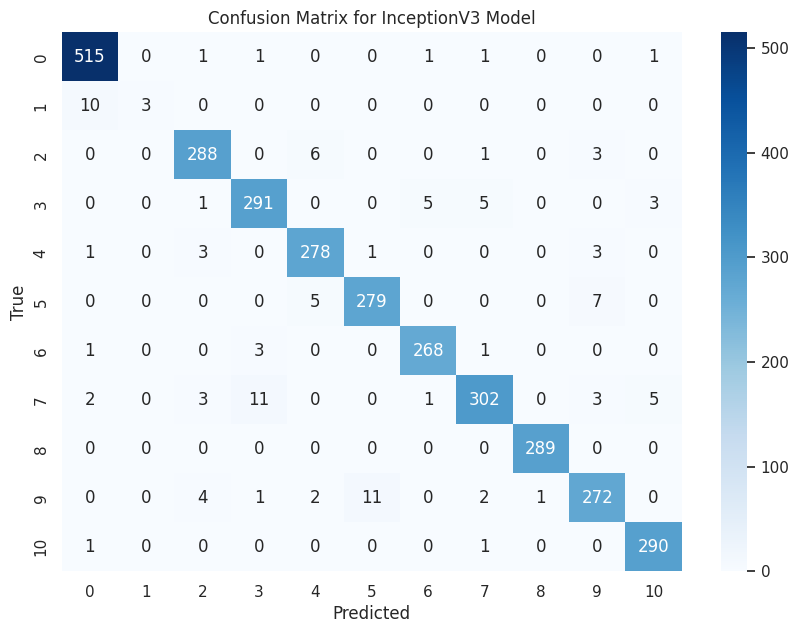

In [ ]:
#CONFUSION MATRIX
# Set model to eval mode
inceptionv3.eval()

# Lists to store all predictions and true labels
all_preds_inceptionv3 = []
all_labels_inceptionv3 = []

with torch.no_grad():
    for images, labels in test_loader_inv:  # <- use Inception's test loader
        images, labels = images.to(device), labels.to(device)
        outputs = inceptionv3(images)

        # Handle InceptionV3 output
        if isinstance(outputs, tuple):
            outputs = outputs[0]

        _, preds = torch.max(outputs, 1)

        all_preds_inceptionv3.extend(preds.cpu().numpy())
        all_labels_inceptionv3.extend(labels.cpu().numpy())

# Generate confusion matrix
cm_inceptionv3 = confusion_matrix(all_labels_inceptionv3, all_preds_inceptionv3)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_inceptionv3, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for InceptionV3 Model')
plt.show()

In [ ]:
# Save the trained model
torch.save(inceptionv3.state_dict(), 'inceptionv3_model_dict.pth')
print("(inceptionv3 model dictionary saved successfully!")

# Save the entire model
torch.save(inceptionv3, 'inceptionv3_model.pth')
print("(inceptionv3 Model  saved successfully!")




# Save the model to Google Drive

torch.save(inceptionv3.state_dict(),'/content/drive/My Drive/inceptionv3_model_dict.pth')
torch.save(inceptionv3, '/content/drive/My Drive/inceptionv3_model.pth')


(inceptionv3 model dictionary saved successfully!
(inceptionv3 Model  saved successfully!


                 **EfficientNetB0 pretrained model**

In [ ]:
# Load EfficientNetB0 pretrained model
efficientnetb0 = models.efficientnet_b0(pretrained=True)

# Freeze all layers initially
for param in efficientnetb0.parameters():
    param.requires_grad = False

# Replace the classifier head
num_features = efficientnetb0.classifier[1].in_features
efficientnetb0.classifier[1] = nn.Linear(num_features, 11)  # 11 classes

# Unfreeze the classifier layers for training
for param in efficientnetb0.classifier.parameters():
    param.requires_grad = True

# Move model to device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
efficientnetb0.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(efficientnetb0.parameters(), lr=0.0001)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 125MB/s] 


EfficientNet

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
………………………………………………………
(avgpool): AdaptiveAvgPool2d(output_size=1)
  **(classifier)**: Sequential(
    (0): Dropout(p=0.2, inplace=True)
 **   (1): Linear(in_features=1280, out_features=1000, bias=True)**
  )
)


In [ ]:
# Train the model
pre_train_model(efficientnetb0, train_loader_inv, val_loader_inv, criterion, optimizer, device, epochs=20)


Epoch [1/20]


100%|██████████| 195/195 [00:43<00:00,  4.45it/s]

Train Loss: 2.0142 | Train Accuracy: 53.09%


Val Loss: 1.6551 | Val Accuracy: 84.71%

Epoch [2/20]


100%|██████████| 195/195 [00:44<00:00,  4.39it/s]

Train Loss: 1.4656 | Train Accuracy: 84.63%


Val Loss: 1.1797 | Val Accuracy: 92.77%

Epoch [3/20]


100%|██████████| 195/195 [00:44<00:00,  4.40it/s]

Train Loss: 1.1210 | Train Accuracy: 90.02%


Val Loss: 0.9026 | Val Accuracy: 93.68%

Epoch [4/20]


100%|██████████| 195/195 [00:44<00:00,  4.36it/s]

Train Loss: 0.8926 | Train Accuracy: 92.53%


Val Loss: 0.7203 | Val Accuracy: 95.15%

Epoch [5/20]


100%|██████████| 195/195 [00:45<00:00,  4.30it/s]

Train Loss: 0.7355 | Train Accuracy: 93.65%


Val Loss: 0.6111 | Val Accuracy: 95.33%

Epoch [6/20]


100%|██████████| 195/195 [00:44<00:00,  4.40it/s]

Train Loss: 0.6325 | Train Accuracy: 94.38%


Val Loss: 0.5179 | Val Accuracy: 96.43%

Epoch [7/20]


100%|██████████| 195/195 [00:45<00:00,  4.32it/s]

Train Loss: 0.5501 | Train Accuracy: 95.07%


Val Loss: 0.4546 | Val Accuracy: 96.70%

Epoch [8/20]


100%|██████████| 195/195 [00:44<00:00,  4.34it/s]

Train Loss: 0.4880 | Train Accuracy: 94.97%


Val Loss: 0.3737 | Val Accuracy: 96.52%

Epoch [9/20]


100%|██████████| 195/195 [00:44<00:00,  4.34it/s]

Train Loss: 0.4388 | Train Accuracy: 95.21%


Val Loss: 0.3543 | Val Accuracy: 96.15%

Epoch [10/20]


100%|██████████| 195/195 [00:45<00:00,  4.30it/s]

Train Loss: 0.3893 | Train Accuracy: 96.00%


Val Loss: 0.2983 | Val Accuracy: 97.07%

Epoch [11/20]


100%|██████████| 195/195 [00:45<00:00,  4.30it/s]

Train Loss: 0.3573 | Train Accuracy: 96.16%


Val Loss: 0.2806 | Val Accuracy: 97.16%

Epoch [12/20]


100%|██████████| 195/195 [00:44<00:00,  4.35it/s]

Train Loss: 0.3302 | Train Accuracy: 96.37%


Val Loss: 0.2460 | Val Accuracy: 97.44%

Epoch [13/20]


100%|██████████| 195/195 [00:45<00:00,  4.30it/s]

Train Loss: 0.3014 | Train Accuracy: 96.82%


Val Loss: 0.2292 | Val Accuracy: 97.99%

Epoch [14/20]


100%|██████████| 195/195 [00:45<00:00,  4.27it/s]

Train Loss: 0.2807 | Train Accuracy: 96.90%


Val Loss: 0.2020 | Val Accuracy: 97.44%

Epoch [15/20]


100%|██████████| 195/195 [00:44<00:00,  4.41it/s]

Train Loss: 0.2641 | Train Accuracy: 97.12%


Val Loss: 0.2013 | Val Accuracy: 97.99%

Epoch [16/20]


100%|██████████| 195/195 [00:44<00:00,  4.40it/s]

Train Loss: 0.2455 | Train Accuracy: 96.96%


Val Loss: 0.1695 | Val Accuracy: 98.08%

Epoch [17/20]


100%|██████████| 195/195 [00:44<00:00,  4.39it/s]

Train Loss: 0.2282 | Train Accuracy: 97.20%


Val Loss: 0.1744 | Val Accuracy: 97.99%

Epoch [18/20]


100%|██████████| 195/195 [00:44<00:00,  4.37it/s]

Train Loss: 0.2199 | Train Accuracy: 97.32%


Val Loss: 0.1437 | Val Accuracy: 98.44%

Epoch [19/20]


100%|██████████| 195/195 [00:45<00:00,  4.30it/s]

Train Loss: 0.2076 | Train Accuracy: 97.16%


Val Loss: 0.1470 | Val Accuracy: 97.99%

Epoch [20/20]


100%|██████████| 195/195 [00:46<00:00,  4.19it/s]

Train Loss: 0.1967 | Train Accuracy: 97.56%


Val Loss: 0.1311 | Val Accuracy: 98.72%
Training complete.


EPOCH 1:

Train Loss: 2.0142 | Train Accuracy: 53.09%

Val Loss: 1.6551 | Val Accuracy: 84.71%



EPOCH10:

Train Loss: 0.3893 | Train Accuracy: 96.00%

Val Loss: 0.2983 | Val Accuracy: 97.07%



EPOCH 20:
Train Loss: 0.1967 | Train Accuracy: 97.56%

Val Loss: 0.1311 | Val Accuracy: 98.72%

TRAINING ACCURACY AND VAL ACCURACY HAVE IMPROVED

[EfficientNetB0] Accuracy: 99.15%
[EfficientNetB0] Precision: 99.16%
[EfficientNetB0] Recall: 99.15%
[EfficientNetB0] F1 Score: 99.06%


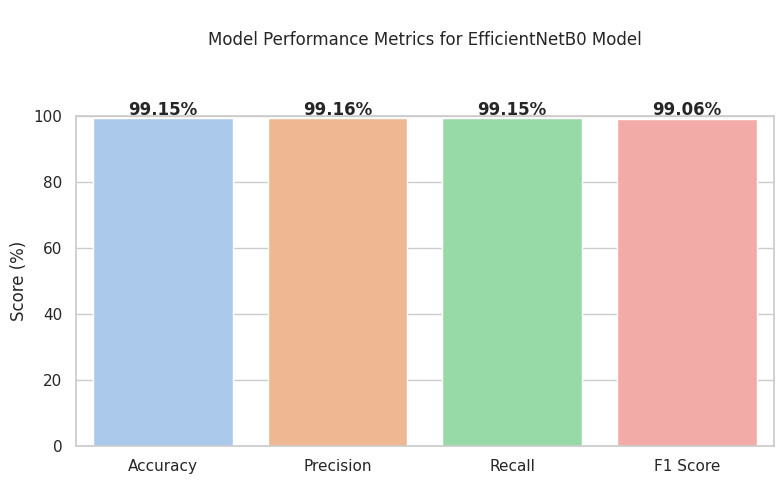

In [ ]:
#Performance Metrics for EfficientNetB0 Model
# Set model to evaluation mode
efficientnetb0.eval()

# Lists for storing predictions and labels
all_preds_efficientnetb0 = []
all_labels_efficientnetb0 = []

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader_inv:  # <- use your test_loader for EfficientNetB0
        images, labels = images.to(device), labels.to(device)
        outputs = efficientnetb0(images)

        # Handle EfficientNetB0 outputs (if required, depending on your model)
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # Use only the main output during testing

          #maximum score for each sample in the batch
        _, predicted = torch.max(outputs, 1)

        all_preds_efficientnetb0.extend(predicted.cpu().numpy())
        all_labels_efficientnetb0.extend(labels.cpu().numpy())

# Compute metrics
accuracy_efficientnetb0 = accuracy_score(all_labels_efficientnetb0, all_preds_efficientnetb0)
precision_efficientnetb0 = precision_score(all_labels_efficientnetb0, all_preds_efficientnetb0, average='weighted', zero_division=0)
recall_efficientnetb0 = recall_score(all_labels_efficientnetb0, all_preds_efficientnetb0, average='weighted', zero_division=0)
f1_efficientnetb0 = f1_score(all_labels_efficientnetb0, all_preds_efficientnetb0, average='weighted', zero_division=0)

# Print the result
print(f"[EfficientNetB0] Accuracy: {accuracy_efficientnetb0 * 100:.2f}%")
print(f"[EfficientNetB0] Precision: {precision_efficientnetb0 * 100:.2f}%")
print(f"[EfficientNetB0] Recall: {recall_efficientnetb0 * 100:.2f}%")
print(f"[EfficientNetB0] F1 Score: {f1_efficientnetb0 * 100:.2f}%")

# Plotting the performance metrics for EfficientNetB0
sns.set(style="whitegrid")

metrics_efficientnetb0 = {
    'Accuracy': accuracy_efficientnetb0 * 100,
    'Precision': precision_efficientnetb0 * 100,
    'Recall': recall_efficientnetb0 * 100,
    'F1 Score': f1_efficientnetb0 * 100
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics_efficientnetb0.keys()), y=list(metrics_efficientnetb0.values()), palette='pastel')

for i, v in enumerate(metrics_efficientnetb0.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.title('\nModel Performance Metrics for EfficientNetB0 Model\n\n\n')
plt.tight_layout()
plt.show()

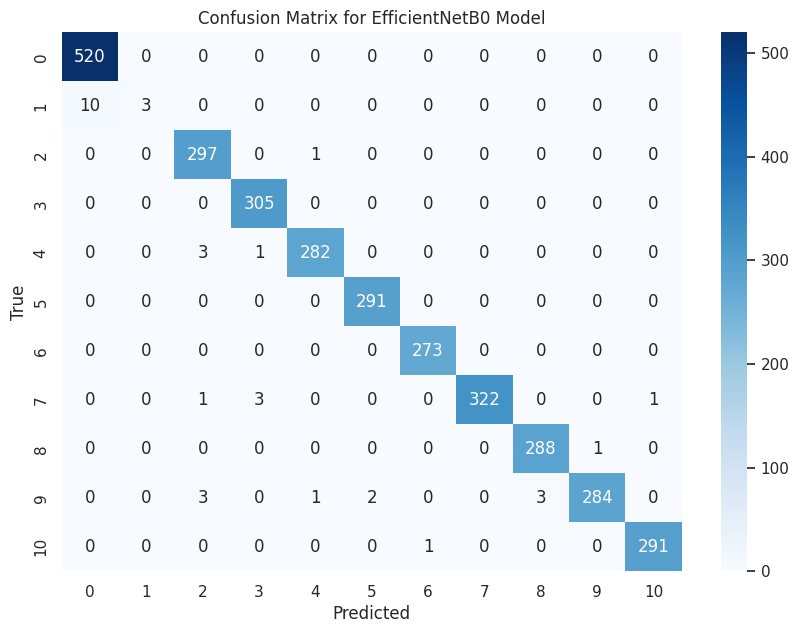

In [ ]:
# Set model to eval mode
efficientnetb0.eval()

# Lists for storing predictions and labels
all_preds_efficientnetb0 = []
all_labels_efficientnetb0 = []

with torch.no_grad():
    for images, labels in test_loader_inv:  # <- use your test_loader for EfficientNetB0
        images, labels = images.to(device), labels.to(device)
        outputs = efficientnetb0(images)

        _, preds = torch.max(outputs, 1)

        all_preds_efficientnetb0.extend(preds.cpu().numpy())
        all_labels_efficientnetb0.extend(labels.cpu().numpy())

# Generate confusion matrix
cm_efficientnetb0 = confusion_matrix(all_labels_efficientnetb0, all_preds_efficientnetb0)

# Plot confusion matrix for EfficientNetB0
plt.figure(figsize=(10, 7))
sns.heatmap(cm_efficientnetb0, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for EfficientNetB0 Model')
plt.show()

In [ ]:
# Save the trained EfficientNetB0 model's state dict
torch.save(efficientnetb0.state_dict(), 'efficientnetb0_model.pth')
print("EfficientNetB0 model saved successfully!")

In [ ]:
# Save the trained model
torch.save(efficientnetb0.state_dict(), 'efficientnetb0_model_dict.pth')
print("efficientnetb0 model dictionary saved successfully!")

# Save the entire model
torch.save(efficientnetb0, 'efficientnetb0_model.pth')
print("efficientnetb0 Model  saved successfully!")




# Save the model to Google Drive

torch.save(efficientnetb0.state_dict(),'/content/drive/My Drive/efficientnetb0_model_dict.pth')
torch.save(efficientnetb0, '/content/drive/My Drive/efficientnetb0_model.pth')


efficientnetb0 model dictionary saved successfully!
efficientnetb0 Model  saved successfully!


            **OVERALL PERFORMANCE COMPARSION OF ALL PRETRAINED MODELS**

In [ ]:
# Define model names and corresponding evaluation metrics
model_names = ['VGG16', 'ResNet50', 'MobileNet', 'InceptionV3', 'EfficientNetB0']

# Store the evaluation metrics for each model
accuracies = [accuracy_vgg * 100, accuracy_resnet * 100, accuracy_mobilenet * 100, accuracy_inceptionv3 * 100, accuracy_efficientnetb0 * 100]
precisions = [precision_vgg * 100, precision_resnet * 100, precision_mobilenet * 100, precision_inceptionv3 * 100, precision_efficientnetb0 * 100]
recalls = [recall_vgg * 100, recall_resnet * 100, recall_mobilenet * 100, recall_inceptionv3 * 100, recall_efficientnetb0 * 100]
f1_scores = [f1_vgg * 100, f1_resnet * 100, f1_mobilenet * 100, f1_inceptionv3 * 100, f1_efficientnetb0 * 100]

# Create a DataFrame for easy comparison
import pandas as pd

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Display the metrics for comparison
print(metrics_df)



            Model   Accuracy  Precision     Recall   F1 Score
0           VGG16  98.839034  98.794235  98.839034  98.749387
1        ResNet50  98.180107  98.191275  98.180107  98.125026
2       MobileNet  98.525259  98.497200  98.525259  98.472835
3     InceptionV3  97.144650  97.160948  97.144650  97.013237
4  EfficientNetB0  99.152808  99.159493  99.152808  99.056062


In [ ]:
# Save the DataFrame to a CSV file
metrics_df.to_csv('model_performance_comparison.csv', index=False)
print("Metrics saved to 'model_performance_comparison.csv' successfully!")


Metrics saved to 'model_performance_comparison.csv' successfully!


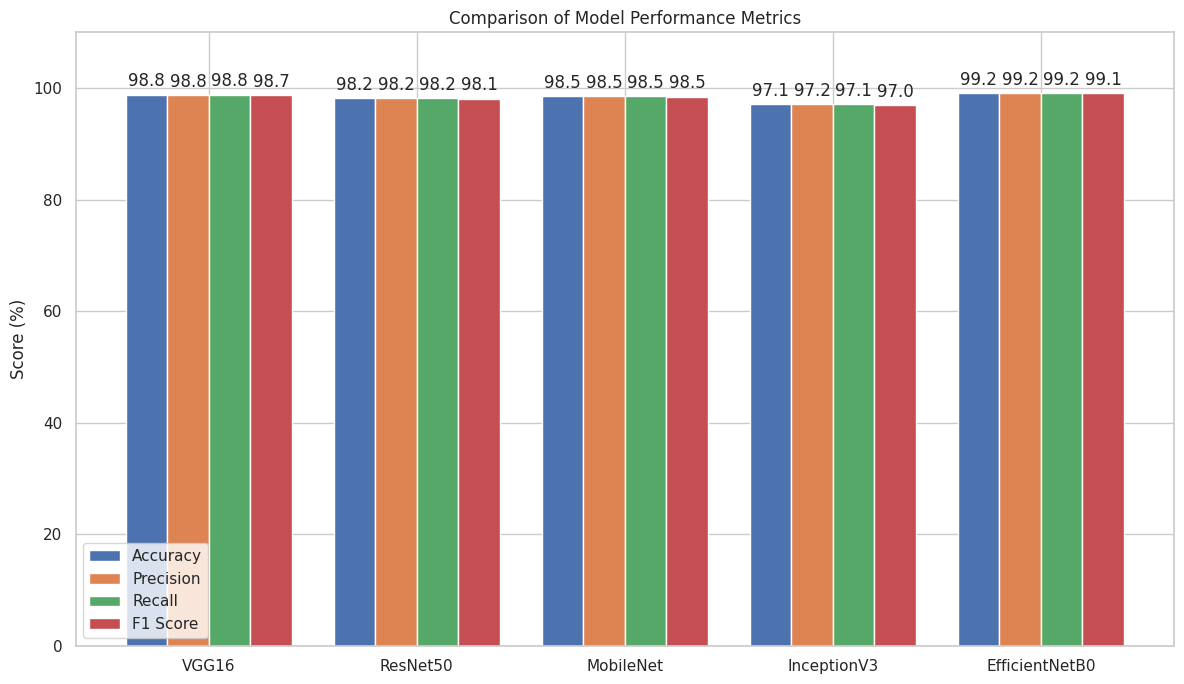

In [ ]:
# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = metrics_df['Model'].tolist()
x = np.arange(len(models))  # label locations
width = 0.2  # width of the bars

# Create the figure
fig, ax = plt.subplots(figsize=(12, 7))

# Plot each metric
rects1 = ax.bar(x - 1.5*width, metrics_df['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, metrics_df['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, metrics_df['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, metrics_df['F1 Score'], width, label='F1 Score')

# Labels
ax.set_ylabel('Score (%)')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 110)
ax.legend()
ax.bar_label(rects1, padding=3, fmt='%.1f')
ax.bar_label(rects2, padding=3, fmt='%.1f')
ax.bar_label(rects3, padding=3, fmt='%.1f')
ax.bar_label(rects4, padding=3, fmt='%.1f')

fig.tight_layout()
plt.show()

OF ALL PRE TRAINED MODELS,Efficientnetb0 model shows the highest accuracy,precision,recall and f1_score.
SO WE SHALL CHOOSE THE efficientnetb0 model as the BEST MODEL